In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

np.random.seed(8)

In [253]:
def make_prediction(X_train, y_train, X_test):
    beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_tilde = X_test @ beta_hat + np.mean(y_train)

    return y_tilde

In [254]:
def plot_error_bias_variance(error, bias, variance, functionof, titlestring, y_limit=False):
    plt.plot(functionof, error, label="Error")
    plt.plot(functionof, bias, label="Bias")
    plt.plot(functionof, variance, label="Variance")
    plt.title(f"Bias-variance tradeoff with varying {titlestring}")
    if y_limit:
        plt.ylim(top=1.5)
    plt.legend()
    plt.show()

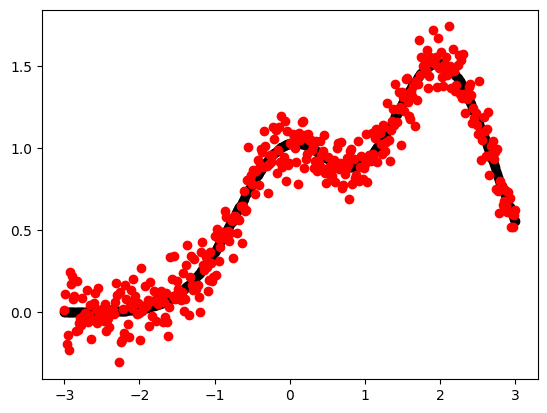

In [255]:
# Test 1: Varying complexity of polynomial model
n = 400
n_bootstraps = 120
maxdegree = 15

# Making data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
exact_y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
y = exact_y + np.random.normal(0, 0.1, x.shape)

plt.scatter(x, exact_y, color="black")
plt.scatter(x, y, color="red")


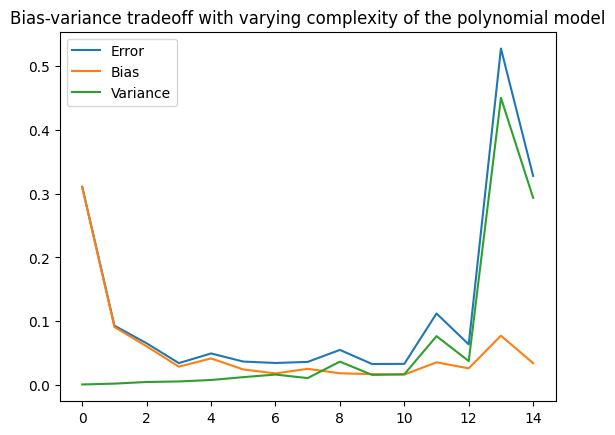

In [256]:

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

for degree in range(maxdegree):
    X = np.zeros((len(x),degree))

    for i in range(degree):
        X[:,i] = x[:,0]**(i+1) 

        mean = np.mean(X[:,i])
        X[:,i] -= mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    y_pred = np.empty((y_test.shape[0], n_bootstraps))

    for i in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        # Evaluating the new model on the same test data every time
        y_pred[:, i] = make_prediction(X_, y_, X_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

plot_error_bias_variance(error, bias, variance, polydegree, "complexity of the polynomial model")

The blue line shows the MSE as a function of the complexity of the model, i.e. polynomial degree. As expected from what we showed earlier in the task, the mean squared error looks to be the sum of the other two metrics. For this specific function, we don't see the trade-off very clearly for the majority of the plot, as the curves mostly seem to follow each other. However, we do see that the bias and variance change between models of 6 and 7 degrees while the error stays the same, which seems to confirm experimentally what we would expect theoretically. We can kind of see the tendencies we were expecting around the start of the plot, since in the variance is increasing while the bias is dropping, and at the end we see the opposite: high variance and low(er) bias.

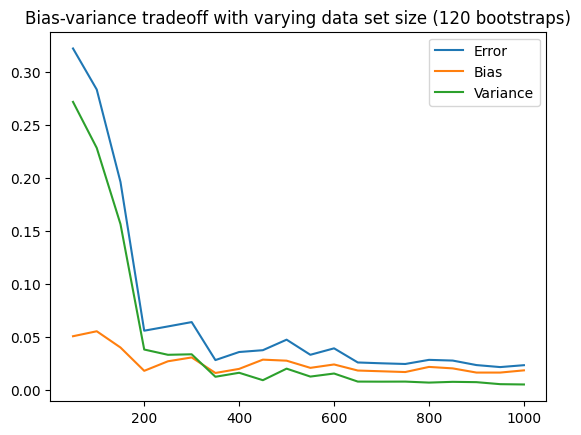

In [257]:
# Test 2a: Varying size of data set with many bootstraps
n_bootstraps = 120
degree = 7

dataset_size = np.arange(50, 1050, 50)
error = np.zeros(len(dataset_size))
bias = np.zeros(len(dataset_size))
variance = np.zeros(len(dataset_size))

for n in enumerate(dataset_size):
    # Making data set
    x = np.linspace(-3, 3, n[1]).reshape(-1, 1)
    exact_y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
    y = exact_y + np.random.normal(0, 0.1, x.shape)

    X = np.zeros((len(x),degree))

    for i in range(degree):
        X[:,i] = x[:,0]**(i+1) 

        mean = np.mean(X[:,i])
        X[:,i] -= mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    y_pred = np.empty((y_test.shape[0], n_bootstraps))

    for i in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        # Evaluating the new model on the same test data every time
        y_pred[:, i] = make_prediction(X_, y_, X_test).ravel()

    error[n[0]] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[n[0]] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[n[0]] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

plot_error_bias_variance(error, bias, variance, dataset_size, f"data set size ({n_bootstraps} bootstraps)")

Pretty much as expected, having more data lowers bias and variance over time all around. However we do see the tradeoff in effect right around 350 points, where the bias finally overtakes the variance despite the variance starting very high and originally accounting for much of the MSE. This makes sense, as with few data points originally, we would expect the variance to be high. Overall, it seems more data is better for lowering all metrics. 

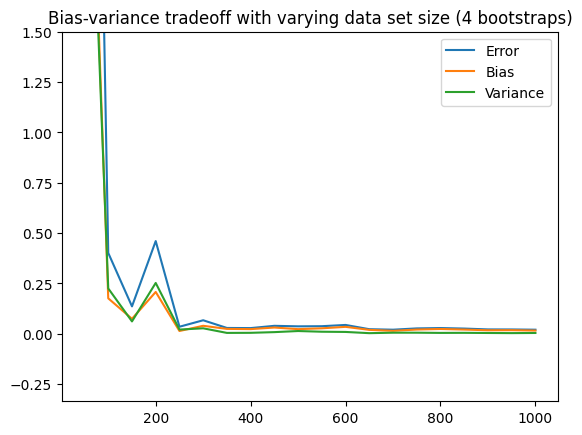

In [258]:
# Test 2b: Varying size of data set with few bootstraps
n_bootstraps = 4
degree = 7

dataset_size = np.arange(50, 1050, 50)
error = np.zeros(len(dataset_size))
bias = np.zeros(len(dataset_size))
variance = np.zeros(len(dataset_size))

for n in enumerate(dataset_size):
    # Making data set
    x = np.linspace(-3, 3, n[1]).reshape(-1, 1)
    exact_y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
    y = exact_y + np.random.normal(0, 0.1, x.shape)

    X = np.zeros((len(x),degree))

    for i in range(degree):
        X[:,i] = x[:,0]**(i+1) 

        mean = np.mean(X[:,i])
        X[:,i] -= mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    y_pred = np.empty((y_test.shape[0], n_bootstraps))

    for i in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        # Evaluating the new model on the same test data every time
        y_pred[:, i] = make_prediction(X_, y_, X_test).ravel()

    error[n[0]] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[n[0]] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[n[0]] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

plot_error_bias_variance(error, bias, variance, dataset_size, f"data set size ({n_bootstraps} bootstraps)", y_limit=True)

Much higher error and very high variance for low $n$, as expected.

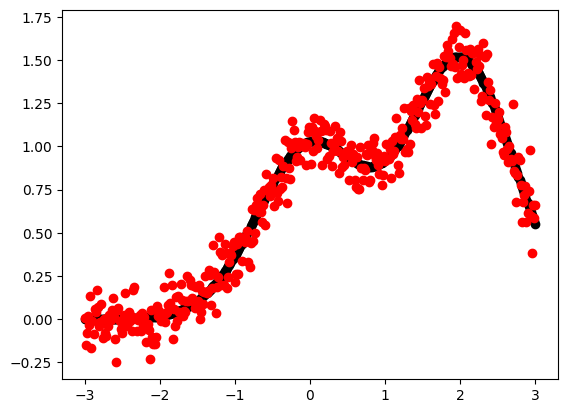

In [259]:
# Test 3: Varying number of bootstrap resamplings
n = 400
degree = 7

# Making data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
exact_y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
y = exact_y + np.random.normal(0, 0.1, x.shape)

plt.scatter(x, exact_y, color="black")
plt.scatter(x, y, color="red")

/Users/emmastorberg/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emmastorberg/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/emmastorberg/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emmastorberg/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/emmastorberg/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


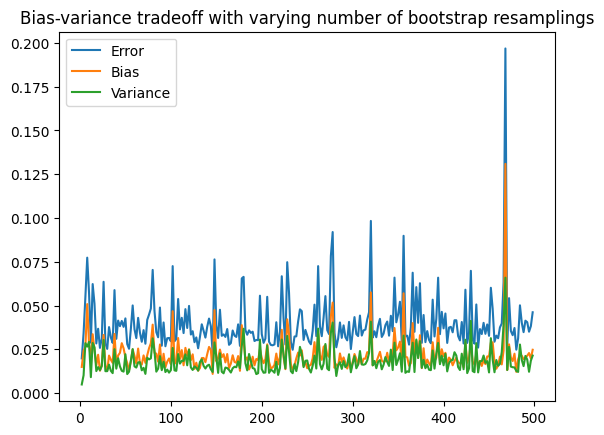

In [260]:

num_bootstraps = np.arange(0, 500, 2)
error = np.zeros(len(num_bootstraps))
bias = np.zeros(len(num_bootstraps))
variance = np.zeros(len(num_bootstraps))

for n_bootstraps in enumerate(num_bootstraps):
    X = np.zeros((len(x),degree))

    for i in range(degree):
        X[:,i] = x[:,0]**(i+1) 

        mean = np.mean(X[:,i])
        X[:,i] -= mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    y_pred = np.empty((y_test.shape[0], n_bootstraps[1]))

    for i in range(n_bootstraps[1]):
        X_, y_ = resample(X_train, y_train)

        # Evaluating the new model on the same test data every time
        y_pred[:, i] = make_prediction(X_, y_, X_test).ravel()

    error[n_bootstraps[0]] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[n_bootstraps[0]] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[n_bootstraps[0]] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

plot_error_bias_variance(error, bias, variance, num_bootstraps, "number of bootstrap resamplings")

Not sure what exactly is to be expected here, but it seems there are specific values for which the error (and the other metrics, as they seem to follow one another) spike. We can still say that the error is relatively low throughout.